# Model: Logistic Regression with Age

https://www.kaggle.com/c/titanic/overview

The model__logreg did not include age as a feature.  This model will include age.  Age with NaN in the entry will be replaced with the mean age of all passengers. 

**Initialization**

In [51]:
%run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from data.data import ExtractData
from models import predict_model as pm
from zeetle.data import eda

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale

RANDOM_STATE = 42

## Extract Clean Data

**Separate data into X (features) and y (label)**

In [53]:
data = ExtractData('../data/raw/train.csv', drop_columns=['cabin', 'name', 'ticket'])
Xy = data.Xy

Xy.age = Xy.age.fillna(value=Xy.age.mean())

In [72]:
NUMERICAL_COLUMNS = ['age', 'sibsp', 'parch', 'fare']
X_numerical = pd.DataFrame(scale(Xy[NUMERICAL_COLUMNS]), index=Xy.index, columns=NUMERICAL_COLUMNS )
X_numerical

X_cat_encoded =  pd.get_dummies(Xy[['pclass', 'sex', 'embarked']], drop_first=True)
X_cat_encoded

,age,sibsp,parch,fare
passengerid,,,,
1,-0.527669,0.522511,-0.506787,-0.516380
2,0.577094,0.522511,-0.506787,0.694046
3,-0.251478,-0.552714,-0.506787,-0.503620
4,0.369951,0.522511,-0.506787,0.350326
5,0.369951,-0.552714,-0.506787,-0.501257
...,...,...,...,...
886,0.646142,-0.552714,5.350885,-0.102875
887,-0.182430,-0.552714,-0.506787,-0.407687
888,-0.734812,-0.552714,-0.506787,-0.086335


,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
passengerid,,,,,
1,0,1,1,0,1
2,0,0,0,0,0
3,0,1,0,0,1
4,0,0,0,0,1
5,0,1,1,0,1
...,...,...,...,...,...
886,0,1,0,1,0
887,1,0,1,0,1
888,0,0,0,0,1


**Verify that age has no NaN**

In [23]:
X_numerical[X_numerical.age.isna()]

,age,sibsp,parch,fare
passengerid,,,,


## Train Test Split Data

In [73]:
X = X_numerical.join(X_cat_encoded)
X.shape
X

y = Xy['survived']
y.shape

(712, 9)

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
passengerid,,,,,,,,,
1,-0.527669,0.522511,-0.506787,-0.516380,0,1,1,0,1
2,0.577094,0.522511,-0.506787,0.694046,0,0,0,0,0
3,-0.251478,-0.552714,-0.506787,-0.503620,0,1,0,0,1
4,0.369951,0.522511,-0.506787,0.350326,0,0,0,0,1
5,0.369951,-0.552714,-0.506787,-0.501257,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0.646142,-0.552714,5.350885,-0.102875,0,1,0,1,0
887,-0.182430,-0.552714,-0.506787,-0.407687,1,0,1,0,1
888,-0.734812,-0.552714,-0.506787,-0.086335,0,0,0,0,1


(712,)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

X_train

y_test = y_test.to_frame()
y_test

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
passengerid,,,,,,,,,
473,0.231856,0.522511,1.836282,-0.128867,1,0,0,0,1
433,0.853284,0.522511,-0.506787,-0.161947,1,0,0,0,1
667,-0.320526,-0.552714,-0.506787,-0.407687,1,0,1,0,1
31,0.715189,-0.552714,-0.506787,-0.129419,0,0,1,0,0
292,-0.734812,0.522511,-0.506787,1.068249,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
94,-0.251478,0.522511,1.836282,-0.264497,0,1,1,0,1
136,-0.458621,-0.552714,-0.506787,-0.369015,1,0,1,0,0
339,1.060427,-0.552714,-0.506787,-0.501257,0,1,1,0,1


,survived
passengerid,
642,1
497,1
263,0
312,1
552,0
...,...
363,0
57,1
138,0


In [75]:
print(f'Number of sample in training data = {len(X_train)}')
print(f'Number of sample in test data = {len(X_test)}')

Number of sample in training data = 569
Number of sample in test data = 143


### Logistic Regression with Age

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

y_pred = pd.Series(logreg.predict(X_test), 
                   index=y_test.index, name='survived_pred').to_frame()
y_pred

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

,survived_pred
passengerid,
642,1
497,1
263,0
312,1
552,0
...,...
363,0
57,1
138,0


## Calculate Metrics

In [77]:
Xy_test = pm.concat_to_create_xy_test(X_test, y_test, y_pred)
Xy_test

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,survived,survived_pred,is_prediction_correct
passengerid,,,,,,,,,,,,
642,-0.389573,-0.552714,-0.506787,0.656556,0,0,0,0,0,1,1,True
497,1.681856,0.522511,-0.506787,0.826054,0,0,0,0,0,1,1,True
263,1.543761,0.522511,0.664747,0.852202,0,0,1,0,1,0,0,True
312,-0.803859,1.597735,1.836282,4.306266,0,0,0,0,0,1,1,True
552,-0.182430,-0.552714,-0.506787,-0.161947,1,0,1,0,1,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
363,1.060427,-0.552714,0.664747,-0.380198,0,1,0,0,0,0,0,True
57,-0.596716,-0.552714,-0.506787,-0.454945,1,0,0,0,1,1,1,True
138,0.508046,0.522511,-0.506787,0.350326,0,0,1,0,1,0,0,True


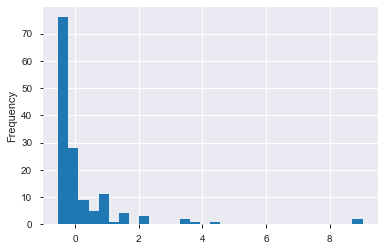

In [80]:
Xy_test.fare.plot(kind='hist', bins=30)

In [78]:
metrics = pm.calc_metrics(Xy_test)

metrics

{'log_loss': 6.5213465723398585, 'accuracy': 0.8111888111888111}

# Drill Down

In [58]:
Xy2 = Xy.join(Xy_test[['survived_pred', 'is_prediction_correct']], how='right')

In [66]:
Xy2.groupby(['sex'])[['survived','survived_pred']].mean()

,survived,survived_pred
sex,,
female,0.764706,0.843137
male,0.260870,0.065217
